This exercise represents a complete machine learning process from preprocessing to model performance testing by using the functions developed using only NumPy without using any other libraries like pandas, scikit-learn, or scipy.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Create a model and even test it - by dividing the dataset into training and test sets. 
To practice NumPy efficiently. I have used only the values of the dataset, ignoring Pandas properties such as column names.



In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=False)

X = california_housing.data
y = california_housing.target

In [3]:
#X.describe()
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### 1. Preprocessing

The first task is to open the dataset and preprocess it into the form that the model can understand. It involves imputation, train_test_split, standardization, and normalization. 



First,I have developed both standardization and normalization functions.


- Standardization: Make features have the same standard deviaton and mean.

- Normalization: Make the range of value normalized into [0, 1]. This means that each column's minimum value should be zero and maximum value should be one.

In [5]:
def standardize(data):

  #Input: NumPy ndarray
  #Output: NumPy ndarray with column mean == 0 and std == 1
  
  data_standardize = np.zeros(data.shape)
  
  for i in range(data.shape[1]):
    
      np_mean = np.mean(data[:, i])    
      np_std = np.std(data[:, i])
      data_standardize[:,i] = (data[:, i] - np_mean) /  np_std
  
    
  
  return data_standardize

def normalize(data):
  """"
  Input: NumPy ndarray
  Output: NumPy ndarray with column min == 0 and max == 1
  """
  data_normalize = np.zeros(data.shape)
  
  for i in range(data.shape[1]):
    
    min_value = np.min(data[:, i])
    max_value = np.max(data[:, i])
  
    data_normalize[:, i] = (data[:, i] - min_value) / (max_value - min_value)
  
  return data_normalize


Let's apply both functions separately and create X_standardized and X_normalized.

In [6]:
X_standardized = standardize(X)
X_normalized = normalize(X)

print(X_standardized)
print(X_normalized)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]
[[0.53966842 0.78431373 0.0435123  ... 0.00149943 0.5674814  0.21115538]
 [0.53802706 0.39215686 0.03822395 ... 0.00114074 0.565356   0.21215139]
 [0.46602805 1.         0.05275646 ... 0.00169796 0.5642933  0.21015936]
 ...
 [0.08276438 0.31372549 0.03090386 ... 0.0013144  0.73219979 0.31175299]
 [0.09429525 0.33333333 0.03178269 ... 0.0011515  0.73219979 0.30179283]
 [0.13025338 0.29411765 0.03125246 ... 0.00154886 0.72582359 0.30976096]]


To check if the functions are correctly made. Created a function to check the dataset's min, max, mean, std of each feature. 

In [7]:
def describe(data):
  
  data_min = np.zeros(data.shape[1])
  data_max = np.zeros(data.shape[1])
  data_mean = np.zeros(data.shape[1])
  data_std = np.zeros(data.shape[1])
  
  for i in range(data.shape[1]):
    
    data_min[i] = np.min(data[:, i])  
    data_max[i] = np.max(data[:, i])
    data_mean[i] = np.mean(data[:, i])
    data_std[i] = np.std(data[:, i])
  
  print("Min: ", data_min)
  print("Max: ", data_max)
  print("Mean: ", data_mean)
  print("Std: ", data_std)
  
  return None

Using this function, let's check if **standardize** and **normalize** functions are correctly working.


In [8]:
describe(X_standardized)

Min:  [-1.77429947 -2.19618048 -1.8523186  -1.61076772 -1.25612255 -0.22899997
 -1.447568   -2.38599234]
Max:  [  5.85828581   1.85618152  55.16323628  69.57171326  30.25033022
 119.41910319   2.95806762   2.62528006]
Mean:  [ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
Std:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
describe(X_normalized)

Min:  [0. 0. 0. 0. 0. 0. 0. 0.]
Max:  [1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  [0.23246376 0.54195071 0.03248795 0.02262871 0.03986874 0.00191395
 0.32857188 0.47612505]
Std:  [0.13101721 0.24676966 0.01753907 0.0140484  0.03173953 0.00835784
 0.226982   0.19955012]


However, this is not a complete setting, we need to both train the model and test it. That means we need to divide the dataset into two parts: {a training set, a test set} and only use the training set to train the model. This means that we also need to create the function for it.

In [10]:
def train_test_split(X, y, test_ratio = 0.3):
  # simulation
  # cross-val

  """
  Input:
    - X: a set of features
    - y: corresponding labels
    - test_ratio: ratio of the test set

  Output:
    - X_train: separated training instances
    - X_test: separated test instances
    - y_train: separated training labels
    - y_test: separated test labels


  """
  length = len(X)
  
  indices = np.random.permutation(length)     # Randomly shuffle the indices of the data instances
  n_test = int(length * test_ratio)
  
  test_indices = indices[:n_test]             # Divide the indices into two parts with the ratio of [1-test ratio:test ratio]
  train_indices = indices[n_test:]
  
  X_train = X[train_indices]                  #  Select training instances and labels with the first set of indices and test instances and labels with the second set of indices
  y_train = y[train_indices]
  
  X_test = X[test_indices]
  y_test = y[test_indices]
  
  return X_train, X_test, y_train, y_test    #  Return the training set and the test set

Split the dataset into training and test sets with `test ratio = 0.33`.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,0.3)

After applying train_test_split function, we can check the shape of each subset. The training set should have 14,448 rows while the test set might have 6,192 records. 

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))



- Create two functions (**apply_standardization**, **apply_normalization**) that uses training set's statistics and apply standardization or normalization to both sets.

In [13]:
def apply_standardization(X_train, X_test):
  """
  Input:
    - X_train: training instances
    - X_test: test instances

  Output:
    - X_train_standardized
    - X_test_standardized

  """
  X_train_standardized = np.zeros(X_train.shape)
  X_test_standardized = np.zeros(X_test.shape)
  
  for i in range(X_train.shape[1]):
    
    train_mean = np.mean(X_train[:, i])
    train_std = np.std(X_train[:,i])
   
    X_train_standardized[:,i] = (X_train[:,i] - train_mean) / train_std
    X_test_standardized[:,i] = (X_test[:,i] - train_mean ) / train_std
      
  return X_train_standardized, X_test_standardized 

In [14]:
def apply_normalization(X_train, X_test):
  """
  Input:
    - X_train
    - X_test

  Output:
    - X_train_standardized
    - X_test_standardized
  """
  X_train_normalized = np.zeros(X_train.shape)
  X_test_normalized = np.zeros(X_test.shape)
  
  for i in range(X_train.shape[1]):
    
    train_min = np.min(X_train[:, i])
    train_max = np.max(X_train[:,i])
   
    X_train_normalized[:,i] = (X_train[:,i] - train_min) / (train_max - train_min)
    X_test_normalized[:,i] = (X_test[:,i] - train_min) / (train_max - train_min)
      
  return X_train_normalized, X_test_normalized


- Apply two functions (**apply_standardization**, **apply_normalization**) to created standardized and normalized datasets.

In [15]:
X_train_standardized, X_test_standardized = apply_standardization(X_train, X_test)
X_train_normalized, X_test_normalized = apply_normalization(X_train, X_test)

Check the statistics using describe method. Test set should **NOT** have zero mean and standard deviation 1 or zero min and one max. Good test set however might show close value to zero or one.

In [16]:
describe(X_train_standardized)

Min:  [-1.77706013 -2.20031331 -1.74408475 -1.51546111 -1.25468609 -0.19610802
 -1.44080675 -2.39405564]
Max:  [  5.85945965   1.86374841  52.30737797  65.26324504  30.27741757
 100.29204103   2.96736121   2.62385691]
Mean:  [-2.96059473e-16  4.69662453e-17 -1.71389911e-16 -6.68838677e-17
 -9.44242838e-17 -1.77045532e-17  1.03915892e-15  4.63121605e-15]
Std:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
describe(X_test_standardized)

Min:  [-1.77706013 -2.20031331 -1.76046461 -1.12366411 -1.25026723 -0.16400576
 -1.44549629 -2.36906603]
Max:  [ 5.85945965  1.86374841 21.84095219 25.75910926 23.98849552  6.47369767
  2.93453442  2.54389018]
Mean:  [-0.00615343  0.00735947 -0.01303715 -0.01448379  0.00819708 -0.01259721
  0.01481537 -0.01633918]
Std:  [1.00170403 1.00957289 0.81493748 0.77470718 1.0026878  0.13339687
 1.00537732 1.00431698]


In [18]:
describe(X_train_normalized)

Min:  [0. 0. 0. 0. 0. 0. 0. 0.]
Max:  [1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  [0.2327055  0.54140745 0.03226711 0.02269378 0.03979075 0.00195155
 0.32684933 0.47710191]
Std:  [0.1309497  0.24605926 0.01850089 0.01497483 0.03171371 0.00995142
 0.22685161 0.19928606]


In [19]:
describe(X_test_normalized)

Min:  [ 0.          0.         -0.00030304  0.00586709  0.00014014  0.00031946
 -0.00106383  0.00498008]
Max:  [1.         1.         0.4363441  0.40843215 0.80055495 0.06637405
 0.99255319 0.98406375]
Mean:  [0.23189971 0.54321832 0.03202592 0.02247689 0.04005071 0.00182619
 0.33021022 0.47384573]
Std:  [0.13117285 0.24841475 0.01507707 0.01160111 0.03179895 0.00132749
 0.22807146 0.20014637]


### 2. Linear regression

Now the dataset is ready to train a model. We will use the linear regression.

- Created the **solver** function that creates a linear regression line and return the coefficents. 
- Here we have used **all available features** of the dataset.
- Added one column representing a bias to your feature matrix.

The normal equation can be represented as follows:

$\theta = (\textbf{X}^T \cdot \textbf{X})^{-1} \cdot \textbf{X}^T \cdot \textbf{y}$

In [20]:
def solver(X, y):
  """
  Get the weights and bias of linear regression classifier on the input dataset (X, y).

  Input:
   - X: a set of features
   - y: labels
  Output:
   - theta: weights and bias of the linear regression
  """
  array_ones = np.ones((X.shape[0],1))
  X_bias = np.append( X,array_ones, axis = 1)
  #print(X_add)
  
  X_T = np.transpose(X_bias)
  theta = (np.linalg.inv((X_T.dot(X_bias)))).dot(X_T).dot(y)
  
  return theta.tolist()

Run this solver function only on the standardized training set (**X_train_standardized**, **y_train**) to create the model and evalute it later on the test set.

- Run the **solve** function on **X_train_standardized** and **y_train** and save the result to **theta**.

In [21]:
theta = solver(X_train_standardized, y_train)
print(theta)

[0.8202734389355764, 0.12044450056737013, -0.26226512727843854, 0.3064312382619917, -0.0033497792154896415, -0.040030071379064565, -0.8910747059297772, -0.8603840854496043, 2.069132241832785]


Now we have a complete model trained on the training set. Then the next interesting thing is to evaluate if the model is good enough by using the test set. To do this, we need to create a predict function that can return the expected value.

- Create the **predict** function which put each instance into the regression equation to predict the value.

In [22]:
def predict(X, theta):
  """
  Input:
   - X: data instances to predict
   - theta: trained regression coefficients

  Output:
   - y_hat: predicted values (X @ weight) + bias
  """
  bias = theta[0]
  weight = theta[1:]
  y_hat = X.dot(weight) + bias
  return y_hat

#theta = solver(X_train_standardized, y_train)
#print(predict(X_train_standardized,theta))

This predict function should be able to return the predicted value of the housing price. Now we might want to return the mean squared error (and its variants) of the whole model. There can be many different metrics but here we will measure the rooted mean squared error (RMSE). RMSE can be calculated as follows:

$RMSE = \sqrt{\frac{1}{n}\sum_{t=1}^{n}(\hat{y}_t - y_t)^2} $.

Note that $\hat{y}$ is a predicted label and $y$ is a true label.

- Created a function **rooted_mean_squared_error** that calculates the RMSE value.

In [23]:
def rooted_mean_squared_error(X, y, theta):
  """
  Input:
    - X_test: data instances to test
    - y_test: true class labels of the corresponding data instances (X_test)
    - theta: trained regression coefficients

  Output:
    - RMSE: the RMSE score

  Use predict function to calculate our predicted values.
  """
  y_hat = predict(X, theta)
  n = len(X)
  sum = 0
  for i in range(n):
    y_square = (y_hat[i] - y[i])**2
    sum = sum + y_square
  
  rmse_square = sum/n 
  rmse = math.sqrt(rmse_square)
  return rmse

Even though the RMSE is generally the preferred performance measure for
regression tasks, in some contexts we may prefer to use another function. For
example, suppose that there are many outliers. In that case, we may
consider using the mean absolute error (MAE). It's direct translation of l1 and l2 norm. The higher the norm index, the more it focuses on large values and
neglects small ones. This is why the RMSE is more sensitive to
outliers than the MAE. But when outliers are exponentially rare (like
in a bell-shaped curve), the RMSE performs very well and is
generally preferred.

MAE can be calculated as follows:

$MAE = \frac{1}{n}\sum_{t=1}^{n}|\hat{y}_t - y_t|$

- Implemented a function for MAE **mean_absolute_error**, which receives the same parameters *X*, *y*, and *theta*.

In [24]:
def mean_absolute_error(X, y, theta):
  """
  Input:
    - X_test: data instances to test
    - y_test: true values of the corresponding data instances (X_test)
    - theta: trained regression coefficients

  Output:
    - MAE: MAE score

  Use predict function to calculate our predicted values.
  """
  y_hat = predict(X,theta)
  n= len(X)
  sum = 0
  for i in range(n):
    sum = sum + (abs(y_hat[i] - y[i]))

  mae_value = sum / n
              
  return mae_value

Train the regression model on the **standardized** training set and evaluate the method with two different scores: RMSE and MAE. 

In [25]:
rmse_score = rooted_mean_squared_error(X_test_standardized, y_test, theta)
mae_score = mean_absolute_error(X_test_standardized, y_test, theta)

In [26]:
rmse_score, mae_score

(3.3613677147955863, 2.681828339015123)

### 4. Linear regression with regularization

Fortunately, the Ridge regression also can be represented as a closed form solution with the normal equation.

Here Created a variant of previous solver function supporting the Ridge regression.

A closed form solution to Ridge can be represented as follows:

$\theta = (\textbf{X}^T \cdot \textbf{X} + \lambda \textbf{I})^{-1} \cdot \textbf{X}^T \cdot \textbf{y}$

where $\textbf{I}$ is an $(n+1) \times (n+1) $ identity matrix, since the feature matrix also includes the bias column.


In [27]:
def solver_with_ridge(X, y, alpha):
  
 
  array_ones = np.ones((X.shape[0],1))
  
  X_bias = np.append( X , array_ones, axis = 1)
  Iden_matrx = np.identity(X_bias.shape[1])
  X_T = np.transpose(X_bias)
 
  theta = (np.linalg.inv(X_T.dot(X_bias) + (Iden_matrx * (alpha)))).dot(X_T).dot(y)

  return theta.tolist()

Here, comparing the performances changing the $\lambda$ value. Use the $\lambda$ value from 0 to 30 in increments of 0.2. Used RMSE as a score metric. Then saved those 300 scores into the list `scores`.



In [28]:
#theta = solver_with_ridge(X_train_standardized, y_train,alpha=0)
#print(theta)

scores = []

for alpha in np.arange(0,30.0,0.2):

  theta = solver_with_ridge(X_train_standardized, y_train,alpha)
  rmse_score = rooted_mean_squared_error(X_test_standardized, y_test, theta)
  scores.append(rmse_score)

scores

[3.3613677147955863,
 3.361200781906101,
 3.361033918403565,
 3.3608671242387294,
 3.3607003993624236,
 3.3605337437254983,
 3.3603671572788656,
 3.3602006399735065,
 3.36003419176043,
 3.359867812590689,
 3.3597015024154118,
 3.359535261185747,
 3.359369088852923,
 3.3592029853681855,
 3.359036950682868,
 3.358870984748311,
 3.3587050875159363,
 3.358539258937201,
 3.358373498963615,
 3.3582078075467376,
 3.3580421846381654,
 3.3578766301895695,
 3.3577111441526504,
 3.3575457264791626,
 3.3573803771209048,
 3.3572150960297233,
 3.357049883157533,
 3.3568847384562677,
 3.356719661877948,
 3.3565546533745954,
 3.3563897128983036,
 3.3562248404012305,
 3.3560600358355632,
 3.355895299153535,
 3.3557306303074332,
 3.3555660292495952,
 3.3554014959324014,
 3.35523703030828,
 3.35507263232973,
 3.354908301949253,
 3.3547440391194314,
 3.354579843792888,
 3.354415715922296,
 3.3542516554603745,
 3.3540876623598774,
 3.3539237365736314,
 3.353759878054475,
 3.3535960867553354,
 3.35343236262

Plot the graph of different scores here.  The resulting plot behaves in a different way based on the split training and test sets. Sometimes, the error just decreases or increases, but we can also see that the error decreases first, but after some point, it starts to increase. 

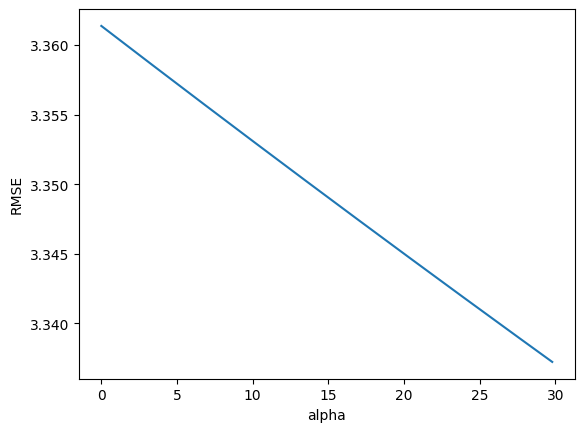

In [29]:
plt.plot(np.arange(0, 30, 0.2), scores)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

### 5. Model validation

So far, we simply had one test set and one training set. Now the question is if those sets were enough to represent the dataset's distribution. To overcome this problem, various validation methods have been developed and used such as cross-validation or a repeated holdout test. Here, we will develop one function that performs the repeated holdout test. The key strategy of it is to create a completely different training and test set pair for each iteration. We need to iterate the holdout test that we performed many (k) times and return the average score.


In [30]:

def repeated_hold_out(X, y, k, test_ratio):
  """
  Input:
    - X: features
    - y: labels
    - test_ratio: ratio of the test set
  Output:
    - score: the average of k different test scores

  """
  scores = []
  for i in range(k):                                                                         #  Iterate k times to perform k validation processes.
    
     X_train, X_test, y_train, y_test = train_test_split(X,y,test_ratio)                     #  split the dataset into training and test sets with *random* indices
     X_train_standardized, X_test_standardized = apply_standardization(X_train, X_test)      #  Used *standardization* to fix the scale of the dataset
     
     theta = solver(X_train_standardized, y_train)                                           #  Fit the model with *solver* (without ridge) on the training set
    
     mae_score = mean_absolute_error(X_test_standardized, y_test, theta)    
     scores.append(mae_score)                                                                #  Save your *MAE* score into the list *scores*
  
  list_avg = np.mean(scores)                                                                 # After all the iterations, return the average of 
  
  return list_avg

Run the holdout test on *X* and *y*, with k = 3 and test ratio = 20%.

In [31]:
holdout_score = repeated_hold_out(X, y, k = 3, test_ratio = 0.2) 
holdout_score

2.6807436108675238

### 6. Put things together

It's time to put everything we have done together here. Here we will create a function that manages whole process from receiving raw datasets to returning performance metrics, by modifying the repeated holdout function. This will help to manage the process clearly since it must contain all the functions we use for your dataset (Later we will replace it with scikit-learn's pipeline technique for the same purpose) - By having these management functions, we can switch off some of the techniques, add more techniques in the middle, or replace some of them with other methods, without any problem or confusion.

* Completed `pipeline` following the instruction.

In [32]:
def pipeline(X, y, k = 5, test_ratio = 0.2, norm_method = "standardization", eval_method = "RMSE", alpha = 0):
  """
  Input:
    - X: features
    - y: labels
    - test_ratio: ratio of the test set
  Output:
    - score: the average of k different test scores

  """
  for i in range(k):                                                                                # Iterate k times to perform k validation processes.
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_ratio)                             #  For each iteration, split the dataset into the training and test sets with *random* indices.
         
    if (norm_method == "standardization") :                                                         # Check the parameter *norm_method* if norm_method == standardization: - Use *standardization* to fix the scale of the dataset
                                                                                                        
      X_train_standardized, X_test_standardized = apply_standardization(X_train,X_test)
      theta = solver_with_ridge(X_train_standardized,y_train,alpha) 
      if (eval_method == "RMSE") :                                                                  # Check the parameter "eval_method"
        scores = rooted_mean_squared_error(X_test_standardized,y_test, theta)
      elif(eval_method == "MAE"):
        scores = mean_absolute_error(X_test_standardized,y_test, theta)
      
        
    elif (norm_method == "normalization") :                                                         # if norm_method == normalization: - Use *normalization* to fix the scale of the dataset
       
      X_train_normalized, X_test_normalized = apply_normalization(X_train, X_test)
      theta = solver_with_ridge(X_train_normalized,y_train, alpha)
      if (eval_method == "RMSE") :                                                                  # Check the parameter "eval_method"
        scores = rooted_mean_squared_error(X_test_normalized,y_test, theta)
      elif(eval_method == "MAE"):
        scores = mean_absolute_error(X_test_normalized,y_test, theta)
      
    avg_scores = np.mean(scores)                                                                    # After all the iterations, return the average of *scores*.

    
  return avg_scores

Now we are ready to run various tasks by using this single function. Will the best model the same under RMSE or MAE? Will different k or test ratio result in different best model? We can do many different trials to find a good model.

- (Optional) Change a normalization method, an alpha value to find out the best classifier under either RMSE or MAE score.

In [35]:
average_rmscores_st = pipeline(X,y,k=5, test_ratio=0.25,norm_method="standardization", eval_method="RMSE", alpha = 1 )
average_rmscores_nm = pipeline(X,y,k=5, test_ratio=0.25,norm_method="normalization", eval_method="RMSE", alpha = 1 )

average_mascores_st = pipeline(X,y,k=5, test_ratio=0.25,norm_method="standardization", eval_method="MAE", alpha = 1 )
average_mascores_nm = pipeline(X,y,k=5, test_ratio=0.25,norm_method="normalization", eval_method="MAE", alpha = 1 )


print(average_rmscores_st)
print(average_rmscores_nm)

print(average_mascores_st)
print(average_mascores_nm)



best_model = average_mascores_st = pipeline(X,y,k=5, test_ratio=0.25,norm_method="standardization", eval_method="MAE", alpha = 1 )
print("\n Best model average score: ", best_model)

3.381554187139335
3.6889707691157625
2.6552233130377147
3.4048585738846215

 Best model average score:  2.667905136573565


# END